In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 24})
df = pd.read_csv('./feature_vector_analysis/prediction_results_globfeat.csv')
df

,SMILES,Device_tier,Train/Valid/Test,CN,predicted,glob_vector
0,CCCCCCCCC=CCCCCCCCC(=O)OC,1,Train,56.000,57.968243,2.691358 14.592575 -9.436014 -5.058424 3.00276...
1,CCCCC/C=C\C/C=C\CCCCCCCC(=O)O,1,Train,31.400,32.391766,1.516829 8.199537 -5.012876 -3.377008 1.524693...
2,CCCCC1CCCC2CCCCC12,1,Train,30.815,29.558361,1.745941 7.646197 -4.469603 -2.352664 1.533207...
3,CC(=CCC=C(C)C=C)C,1,Train,28.000,28.981424,1.265745 7.677176 -4.606571 -2.230392 1.572281...
4,CCCCCCCC(=O)OCC,1,Train,42.060,41.965744,1.682150 10.854990 -6.497653 -3.748828 2.38611...
...,...,...,...,...,...,...
625,CCCCCCCCCCCCCCCCCC(=O)O,3,Test,62.000,70.268470,4.218513 18.318495 -10.543981 -6.405912 4.1426...
626,C1(=C(C=C(C=C1C)C)CCCCCCCCCCCCCCCC)C,3,Test,42.000,38.849712,2.940197 9.780895 -6.842910 -3.857143 3.013691...
627,CCCCCCOC(=O)C1=CC=CC=C1C(=O)OCCCCCC,3,Test,48.000,46.116280,1.885477 14.634890 -7.869594 -3.706099 2.03854...
628,CCCC1=CC2=C(CCCC2)C=C1,3,Test,8.000,7.196462,0.202410 1.829508 -1.479237 -0.212674 0.350839...


# Fig.1 data distribution

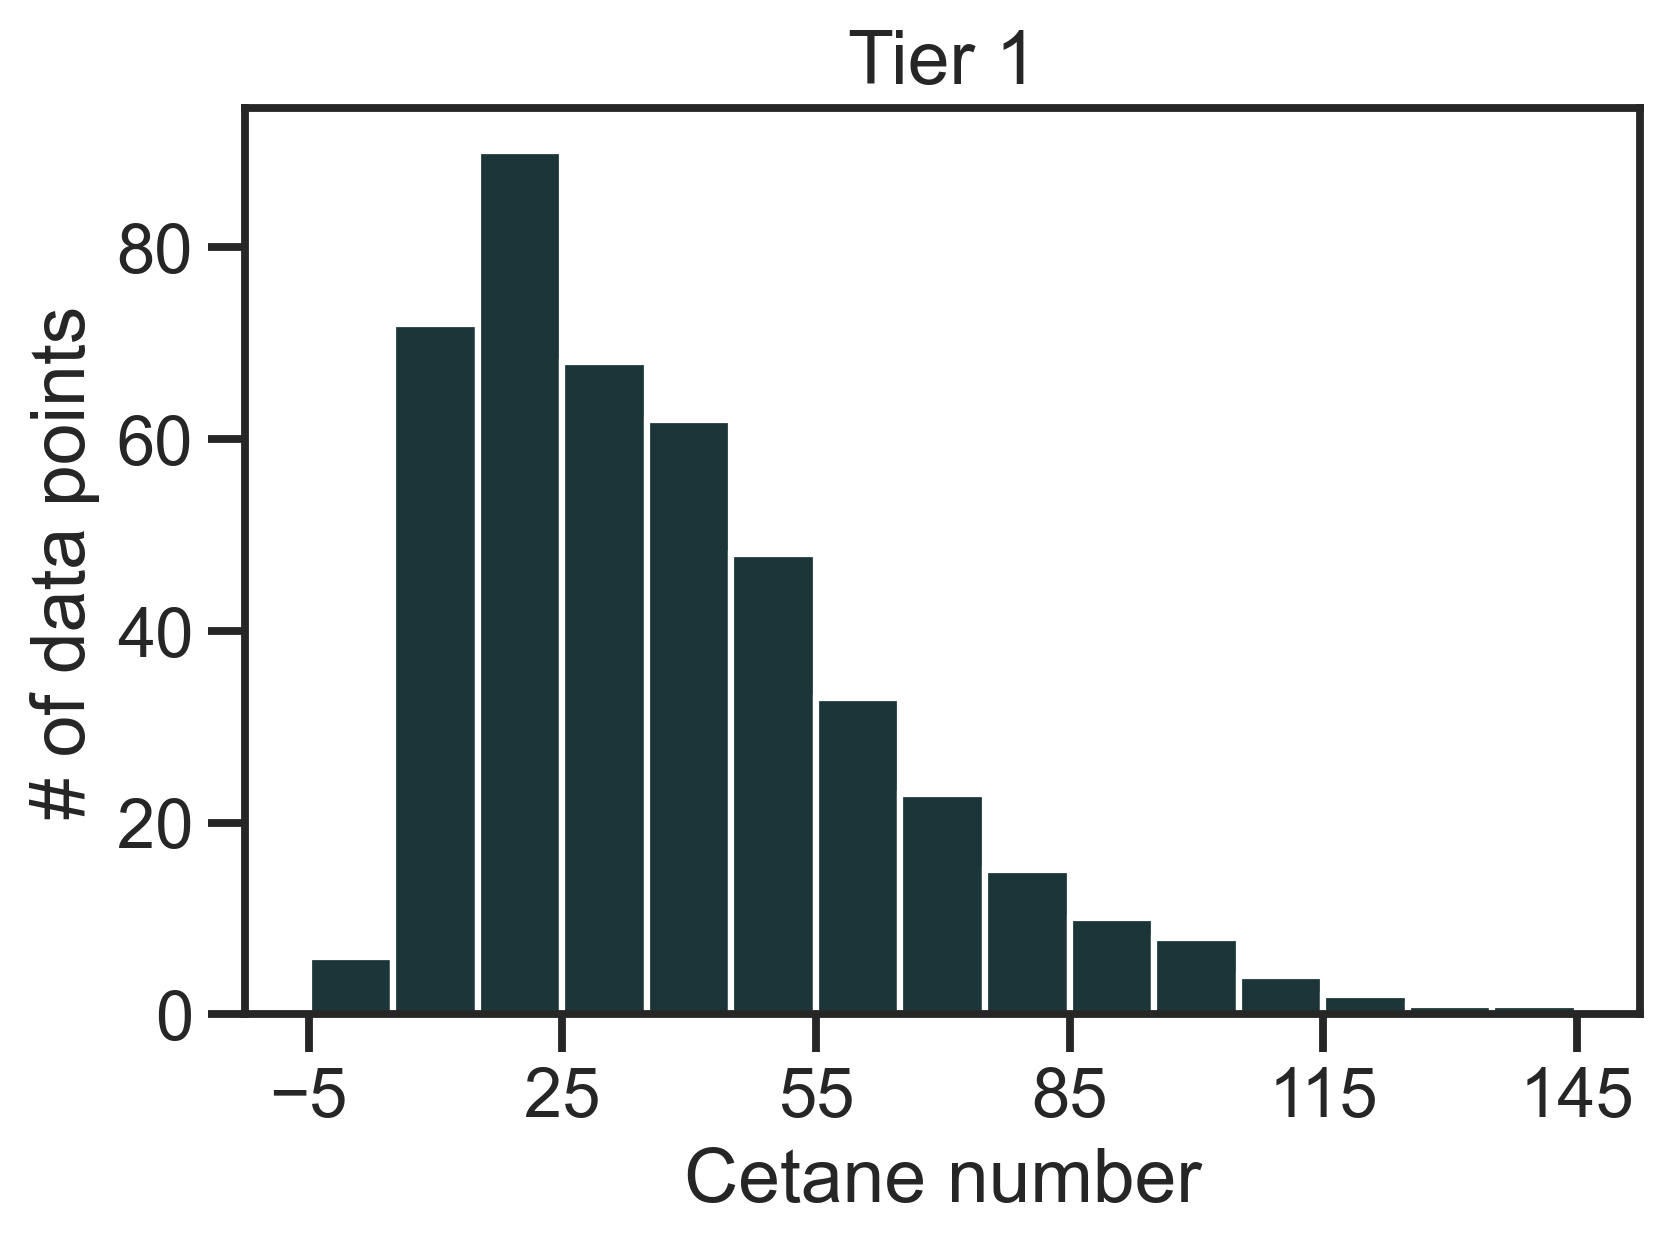

In [2]:
import numpy as np
ax = df[df.Device_tier == 1].CN.hist(bins=np.arange(-5,145.01,10), color='#1B3539')
ax.set_xticks(np.arange(-5,145.01,30))
ax.set_xlabel('Cetane number')
ax.set_ylabel('# of data points')
ax.set_title('Tier 1')
ax.grid(False)

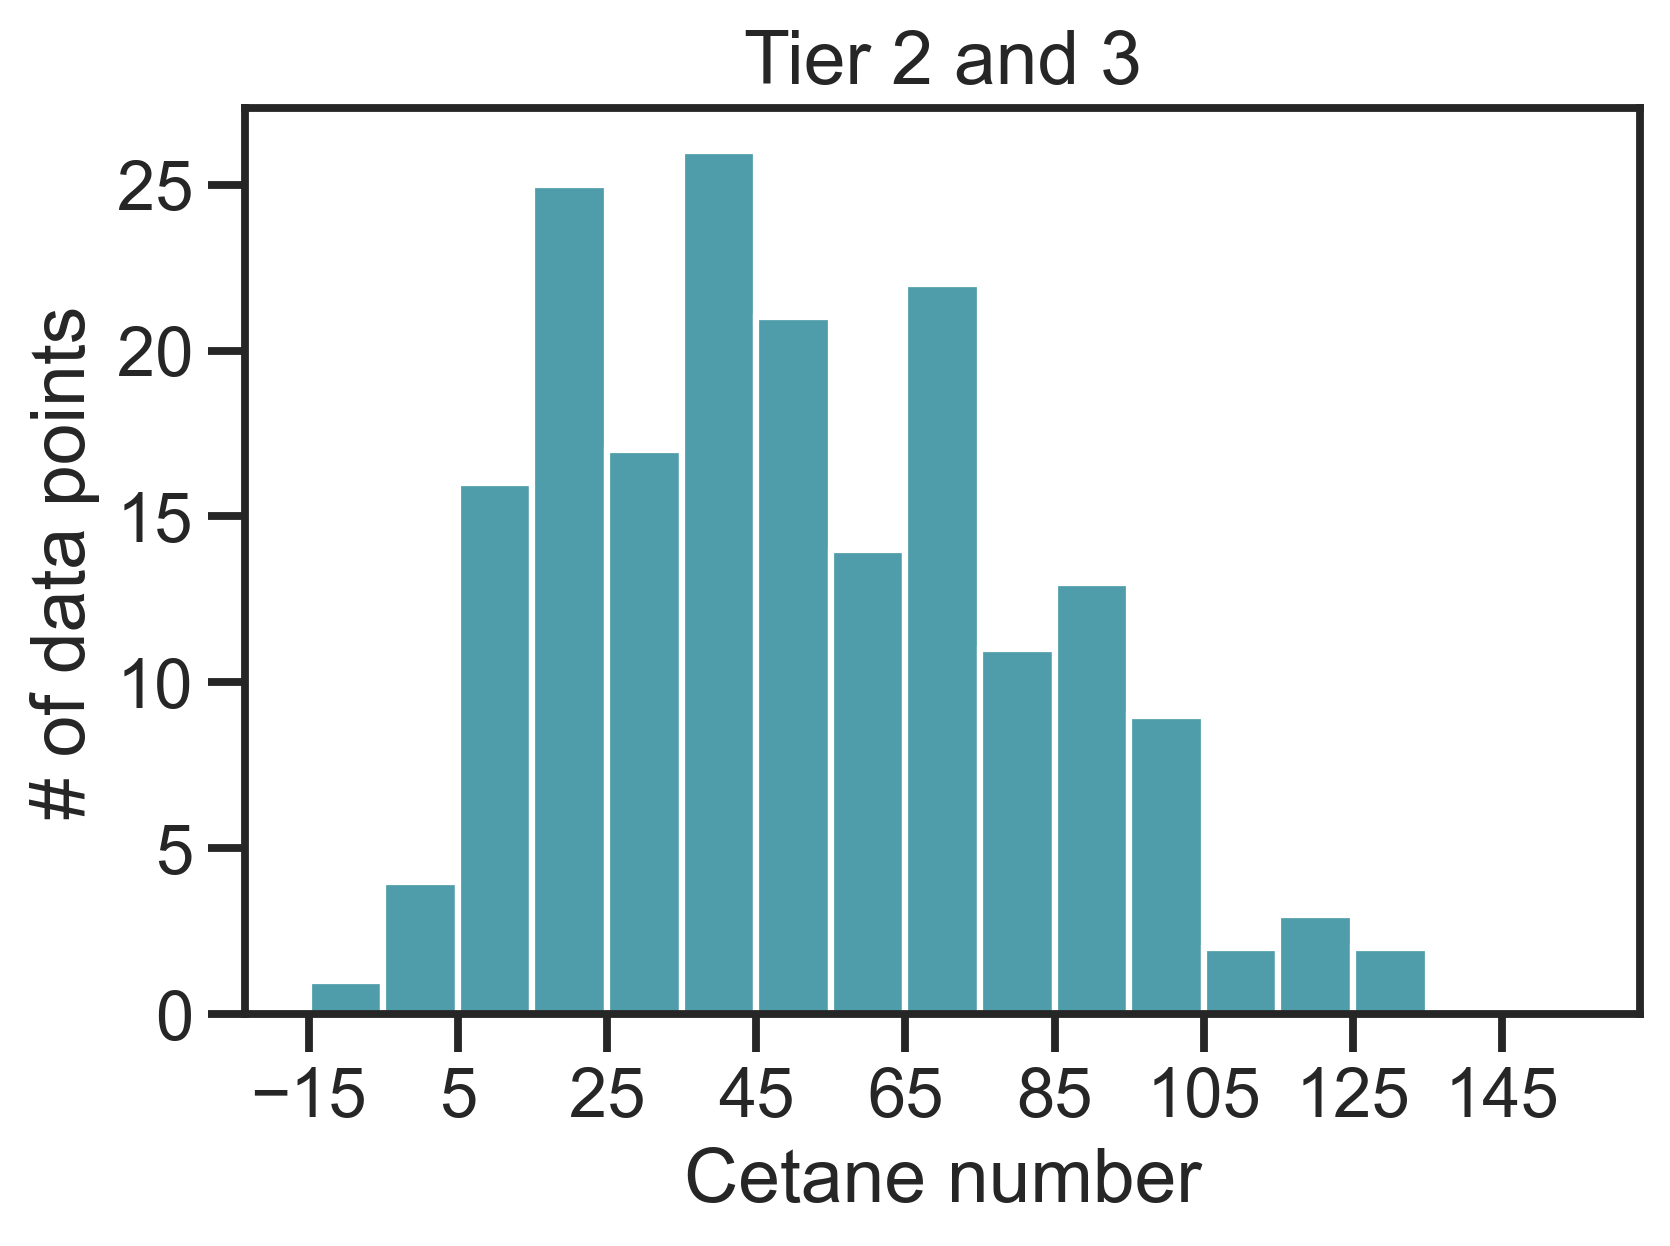

In [3]:
import numpy as np
ax = df[df.Device_tier != 1].CN.hist(bins=np.arange(-15,155.01,10), color='#4F9DAA')
ax.set_xticks(np.arange(-15,155.01,20))
ax.set_xlabel('Cetane number')
ax.set_ylabel('# of data points')
ax.set_title('Tier 2 and 3')
ax.grid(False)

# Fig. 3

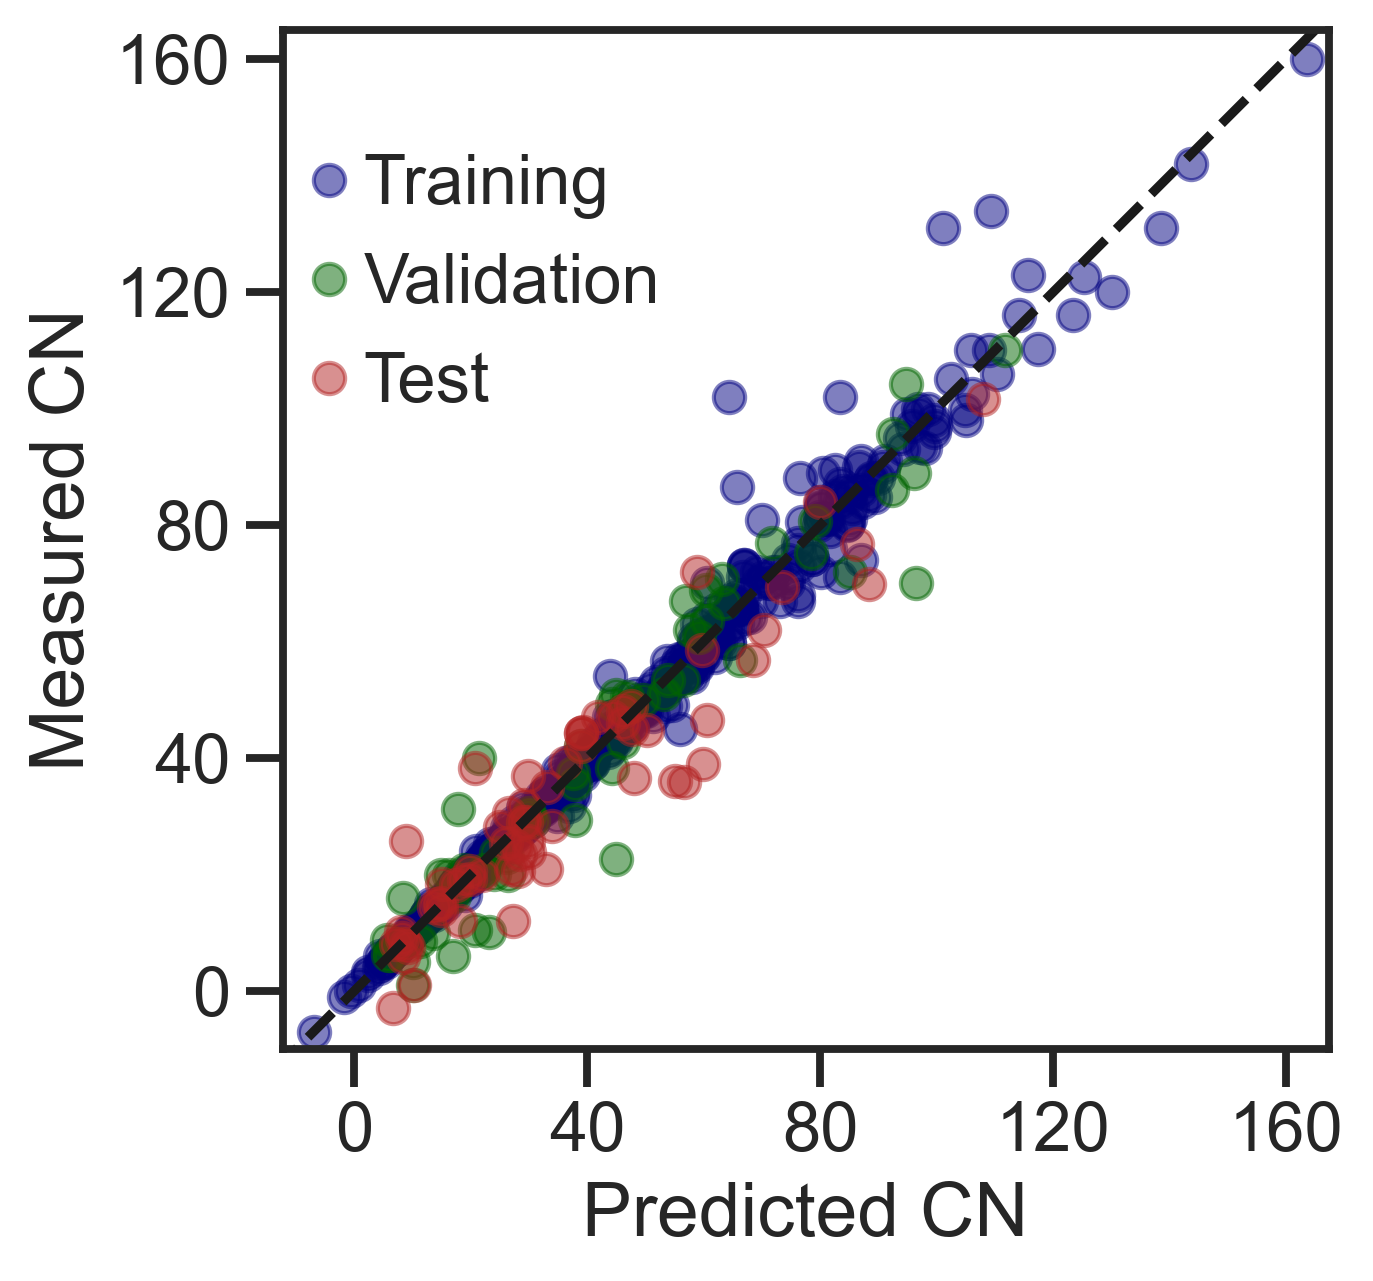

In [4]:
import numpy as np

train_x = df[df['Train/Valid/Test'] == 'Train']['predicted']
train_y = df[df['Train/Valid/Test'] == 'Train']['CN']
valid_x = df[df['Train/Valid/Test'] == 'Valid']['predicted']
valid_y = df[df['Train/Valid/Test'] == 'Valid']['CN']
test_x = df[df['Train/Valid/Test'] == 'Test']['predicted']
test_y = df[df['Train/Valid/Test'] == 'Test']['CN']

fig = plt.figure(figsize=(4.5,4.5))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xticks(np.arange(0.0,160.01,40.0))
ax.set_yticks(np.arange(0.0,160.01,40.0))
ax.set_xlim([-10,165])
ax.set_ylim([-10,165])
ax.set_xlabel('Predicted CN')
ax.set_ylabel('Measured CN')

#ax.plot(train_x, train_y, '.', ms=15, label='Training [3.33]', color='navy')
#ax.plot(valid_x, valid_y, '.',  ms=15, label='Validation [4.21]', color='darkgreen')
#ax.plot(test_x, test_y, '.',  ms=15, label='Test [4.77]', color='firebrick')

ax.plot(train_x, train_y, '.', ms=15, label='Training', alpha=0.5, color='navy')
ax.plot(valid_x, valid_y, '.',  ms=15, label='Validation', alpha=0.5, color='darkgreen')
ax.plot(test_x, test_y, '.',  ms=15, label='Test', alpha=0.5, color='firebrick')
lgnd = ax.legend(loc='center left', bbox_to_anchor=(-0.08, .75), handletextpad=-0.5)
    
ax.plot([-20,240], [-20, 240], '--', color='.1')

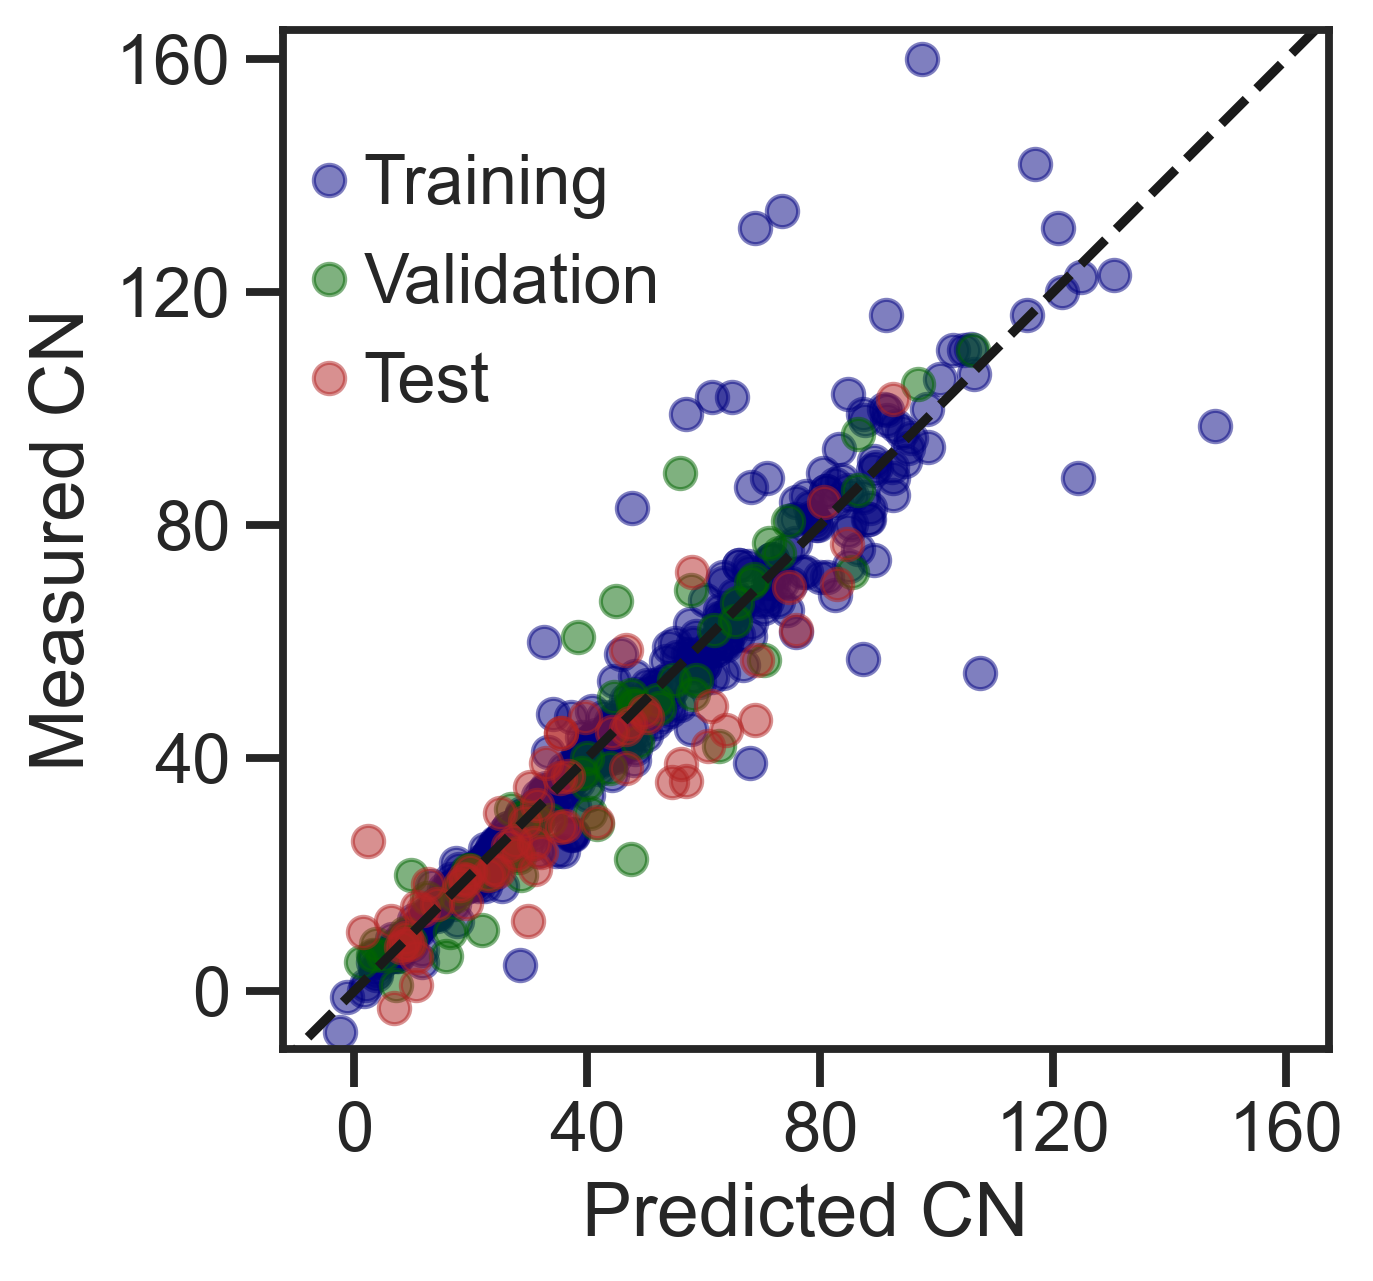

In [5]:
import numpy as np
df2 = pd.read_csv('./feature_vector_analysis/prediction_results_noglobfeat.csv')

train_x = df2[df2['Train/Valid/Test'] == 'Train']['predicted']
train_y = df2[df2['Train/Valid/Test'] == 'Train']['CN']
valid_x = df2[df2['Train/Valid/Test'] == 'Valid']['predicted']
valid_y = df2[df2['Train/Valid/Test'] == 'Valid']['CN']
test_x = df2[df2['Train/Valid/Test'] == 'Test']['predicted']
test_y = df2[df2['Train/Valid/Test'] == 'Test']['CN']

fig = plt.figure(figsize=(4.5,4.5))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xticks(np.arange(0.0,160.01,40.0))
ax.set_yticks(np.arange(0.0,160.01,40.0))
ax.set_xlim([-10,165])
ax.set_ylim([-10,165])
ax.set_xlabel('Predicted CN')
ax.set_ylabel('Measured CN')

#ax.plot(train_x, train_y, '.', ms=15, label='Training [3.33]', color='navy')
#ax.plot(valid_x, valid_y, '.',  ms=15, label='Validation [4.21]', color='darkgreen')
#ax.plot(test_x, test_y, '.',  ms=15, label='Test [4.77]', color='firebrick')

ax.plot(train_x, train_y, '.', ms=15, label='Training', alpha=0.5, color='navy')
ax.plot(valid_x, valid_y, '.',  ms=15, label='Validation', alpha=0.5, color='darkgreen')
ax.plot(test_x, test_y, '.',  ms=15, label='Test', alpha=0.5, color='firebrick')
lgnd = ax.legend(loc='center left', bbox_to_anchor=(-0.08, .75), handletextpad=-0.5)
    
ax.plot([-20,240], [-20, 240], '--', color='.1')

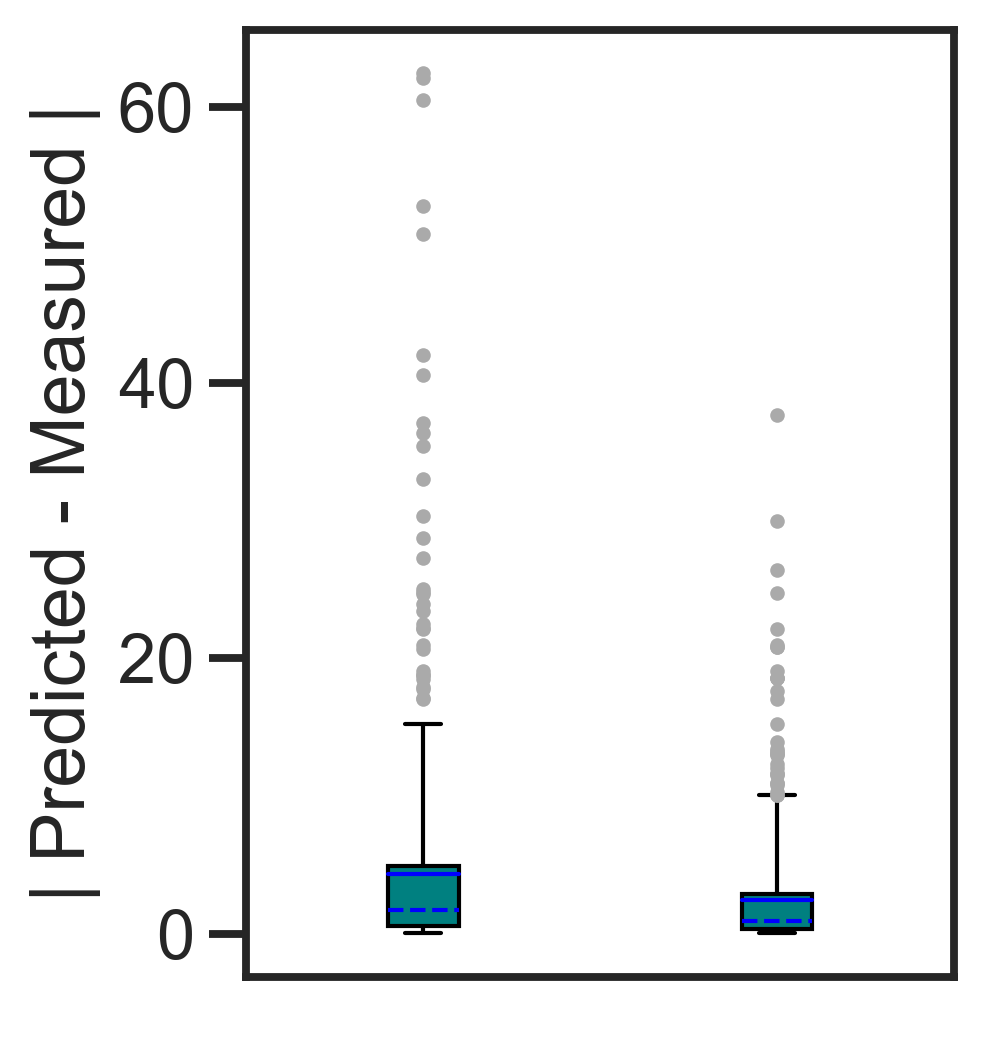

In [6]:
df['AE'] = np.abs(df['CN'] - df['predicted'])
df2['AE'] = np.abs(df2['CN'] - df2['predicted'])

fig = plt.figure(figsize=(3.8,4))
ax = fig.add_subplot(111)
ax.boxplot([df2['AE'],df['AE']], widths = 0.2, 
           patch_artist = True, showmeans = True, 
           meanline = True, 
           bootstrap = 1000, notch = False, labels = ['',''], 
           whis = (0,95),
           medianprops = {'color': 'blue', 'linestyle': '--'}, meanprops = {'color':'blue', 'linestyle': '-'},
           flierprops = {'marker': '.', 'markersize': 7, 'markerfacecolor':'#AAAAAA', 'markeredgecolor':'none'},
           boxprops = {'facecolor': 'Teal'})
ax.set_xticks([])
ax.set_ylabel('| Predicted - Measured |')
ax.set_xlim([0.5,2.5])
plt.tight_layout()

In [7]:
print(np.quantile(df2['AE'], 0.05), np.quantile(df2['AE'], 0.95), np.median(df2['AE']))
print(np.quantile(df['AE'], 0.05), np.quantile(df['AE'], 0.95), np.median(df['AE']))
print('-----------------------')
print(df2['AE'].mean(), df2['AE'].std())
print(df['AE'].mean(), df['AE'].std())
print('-----------------------')
import scipy
print(scipy.stats.iqr(df2['AE']), scipy.stats.iqr(df['AE']))
print('-----------------------')
print(min(df.predicted), min(df2.predicted), min(df['CN']), min(df2['CN']))

0.13291469999999903 16.213522499999918 1.6968659999999982
0.06124024000000059 10.067235250000001 0.8904865000000015
-----------------------
4.293802232285715 7.4955122939860575
2.4429989790317466 4.089458632184433
-----------------------
4.348794500000004 2.537089500000002
-----------------------
-6.966788 -2.3869169 -7.0 -7.0


In [8]:
df[df['CN'] < 0]

,SMILES,Device_tier,Train/Valid/Test,CN,predicted,glob_vector,AE
377,CC1=CC2=C(C=C1)C=C(C=C2)C,2,Train,-7.0,-6.966788,-0.040026 -0.468359 -1.712152 1.895249 -0.4909...,0.033212
482,CC(C)(C)C1=CC=CC=C1,3,Train,-1.0,-1.753992,-0.040978 0.024678 -0.956644 0.575048 -0.06232...,0.753992
579,CC(C)C1=CC(=CC=C1)C(C)C,1,Test,-3.0,6.632534,0.431756 1.559555 -1.170707 -0.493688 0.503992...,9.632534


In [24]:
df[df['CN'] > 100]

,SMILES,Device_tier,Train/Valid/Test,CN,predicted,glob_vector,AE
493,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,3,Train,102.000,64.363480,3.141770 16.292732 -10.423613 -4.996491 3.3201...,37.636520
380,CCCCCCCCC=CCCCCCCCC(=O)OCCCCCCCC,3,Train,131.000,101.058600,5.652853 26.740696 -15.815073 -6.725697 5.6201...,29.941400
474,CCCCCCCCCCOC(=O)CCCCCCCC=CCCCCCCCC,3,Train,134.000,109.294160,6.342606 29.196697 -17.013906 -7.017048 6.1364...,24.705840
423,CCCCCCCCC=CCCCCCCCC(=O)OCCCCCC,3,Train,102.000,83.430080,4.516693 21.652203 -13.150059 -6.030802 4.5581...,18.569920
373,COCCOCCOCCOC,3,Train,120.000,130.085080,7.223765 36.558464 -19.795485 -6.766906 6.4854...,10.085080
506,CCCCCCCCCCCCCCCCC(C)C,1,Valid,104.200,94.705790,5.711333 24.211777 -14.271654 -7.928932 5.4022...,9.494210
264,CCCCCCOCCCCCC,1,Train,131.015,138.538570,9.017511 36.073757 -20.541838 -11.019506 7.983...,7.523570
372,CCOCCOCCOCC,3,Train,123.000,115.643770,6.986994 32.232235 -17.473616 -6.123887 5.8244...,7.356230
128,CCCCOCCCC,1,Train,116.065,123.351810,7.329362 31.393770 -18.454884 -10.420552 6.907...,7.286810
210,CCCCOCC,1,Train,110.185,117.396210,6.635945 29.604013 -17.746078 -9.961516 6.3779...,7.211210


# MAEs (Fig. 3, Table 1)

In [9]:
df['AE'] = np.abs(df['CN'] - df['predicted'])

In [10]:
df[(df['Train/Valid/Test'] == 'Test') & (df.Device_tier !=1)].AE.mean()

6.8511199105263145

In [11]:
df2['AE'] = np.abs(df2['CN'] - df2['predicted'])
df2['Device_tier'] = list(df['Device_tier'])

In [12]:
df2[(df2['Train/Valid/Test'] == 'Test') & (df2['Device_tier'] != 1)].AE.mean()

9.300572473684209

In [13]:
df[((df.SMILES.str.contains('O')) | df.SMILES.str.contains('o')) & (df.Device_tier == 1)].AE.mean()

1.922119375371025

In [14]:
df[((df.SMILES.str.contains('O')) | df.SMILES.str.contains('o')) & (df.Device_tier != 1)].AE.mean()

4.957382638947368

In [15]:
df2[((df2.Canonical_SMILES.str.contains('O')) | df2.Canonical_SMILES.str.contains('o')) & (df2.Device_tier == 1)].AE.mean()

3.0818917945936395

In [16]:
df2[((df2.Canonical_SMILES.str.contains('O')) | df2.Canonical_SMILES.str.contains('o')) & (df2.Device_tier != 1)].AE.mean()

9.525392753684212

In [17]:
df[~(((df.SMILES.str.contains('O')) | df.SMILES.str.contains('o'))) & (df.Device_tier != 1)].AE.mean()

2.756656752826087

In [18]:
df2[~(((df2.Canonical_SMILES.str.contains('O')) | df2.Canonical_SMILES.str.contains('o'))) & (df2.Device_tier != 1)].AE.mean()

4.5061018706521745

In [19]:
df2[df2['Train/Valid/Test'] == 'Test'].AE.mean()

7.015841012031251

# Outliers (Fig. 4)

In [20]:
df = df.sort_values(by=['AE'], ascending=False)

In [21]:
df.iloc[0:10]

,SMILES,Device_tier,Train/Valid/Test,CN,predicted,glob_vector,AE
493,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,3,Train,102.00,64.363480,3.141770 16.292732 -10.423613 -4.996491 3.3201...,37.636520
380,CCCCCCCCC=CCCCCCCCC(=O)OCCCCCCCC,3,Train,131.00,101.058600,5.652853 26.740696 -15.815073 -6.725697 5.6201...,29.941400
558,CCCCCCCCOC(=O)CCCCCCCCC(=O)OCCCCCCCC,3,Valid,70.00,96.371620,5.207996 26.726585 -14.537582 -5.733907 4.9977...,26.371620
474,CCCCCCCCCCOC(=O)CCCCCCCC=CCCCCCCCC,3,Train,134.00,109.294160,6.342606 29.196697 -17.013906 -7.017048 6.1364...,24.705840
553,CCCCCCCCC[C@H](C)c1ccccc1,3,Valid,22.75,44.894367,2.574302 11.325552 -6.823833 -3.963420 2.38909...,22.144367
617,CCCCCCC(C)C,3,Test,39.00,59.920470,3.057789 14.946104 -9.327767 -5.182818 3.31220...,20.920470
442,CCCCCCCCC=CCCCCCCCC(=O)OC(C)C,3,Train,86.60,65.766680,3.147815 16.778856 -10.216600 -5.656386 3.6613...,20.833320
612,C=CCCCC[C@H](CCCC)CCCCCC,3,Test,35.88,56.693436,3.203007 14.473083 -8.717222 -4.549146 3.05266...,20.813436
618,CCCCCCC1CCCCC1,3,Test,36.00,55.066757,3.472020 14.066985 -8.211081 -4.643247 3.10736...,19.066757
423,CCCCCCCCC=CCCCCCCCC(=O)OCCCCCC,3,Train,102.00,83.430080,4.516693 21.652203 -13.150059 -6.030802 4.5581...,18.569920
